In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import math
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
from pprint import pprint
import os
from sklearn import preprocessing
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client.client.flux_table import FluxTable
from datetime import datetime, timedelta
from typing import List
import itertools
from datetime import datetime
import itertools


In [2]:
pred_01 = pd.read_csv("pred_20220807114356.log", names=["index", "date", "fuzzy", "sample", "pairwise",  "trend", "burst_mode", "entropy_mode", "pred_traffic", "pred_container"])
pred_01

,index,date,fuzzy,sample,pairwise,trend,burst_mode,entropy_mode,pred_traffic,pred_container
0,0,2022-08-07T11:43:56.271437,2.500396,-inf,-0.367383,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,249.805714,5
1,0,2022-08-07T11:44:26.321011,1.776586,1.791759,0.104982,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,263.165701,5
2,0,2022-08-07T11:44:56.393518,1.564248,1.981001,0.287008,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,276.621913,5
3,0,2022-08-07T11:45:26.641939,1.511461,2.268684,0.449755,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,287.445109,5
4,0,2022-08-07T11:45:56.533071,1.515124,2.926739,0.376405,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,291.651508,5
5,0,2022-08-07T11:46:26.638101,1.536588,3.044522,0.408033,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,302.647868,6
6,0,2022-08-07T11:46:56.707466,1.354965,2.282382,0.535039,Trend.Up,BurstMode.POOR,EntropyMode.EXPECTED,325.506591,6
7,0,2022-08-07T11:47:26.785075,0.548208,0.682297,0.847147,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,1492.052167,27
8,0,2022-08-07T11:47:56.944583,0.328236,0.287071,0.962853,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,2364.281748,43
9,0,2022-08-07T11:48:27.157227,0.331003,0.449428,0.991458,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,3105.068558,56


In [67]:
def parse(path: str) -> pd.DataFrame:
    # CSVから読み取る
    try:
        df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])
    except Exception as e:
        raise(e)
    df_target = df.to_numpy()

    # いい感じに整形
    requests = pd.DataFrame([{"date": datetime.fromtimestamp(float(d[4])/1000), "status": d[6], "count": 1} for d in df_target if (d[0] == "REQUEST" and not math.isnan(float(d[4])) )])
    if len(requests) == 0:
        return pd.DataFrame([])

    # 1秒ごとにサマる
    grouped1 = requests.groupby([pd.Grouper(key=("status")),pd.Grouper(key=("date"), freq="S")]).sum().reset_index()

    # 全部同じ数は困るので乱数を入れておく
    for x in range(len(grouped1)):
        grouped1.iat[x, 2] += np.random.rand() * sys.float_info.epsilon

    return grouped1

In [4]:
simulation_log_06 = parse("simulation_06.log")
simulation_log_date_06 = simulation_log_06["date"]
simulation_log_count_06 = simulation_log_06["count"]

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_99305/1581826677.py:4: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])


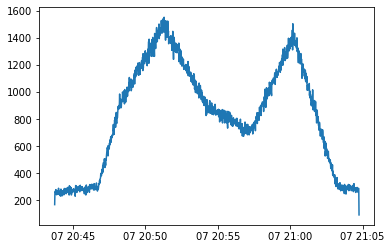

In [5]:
plt.plot(simulation_log_date_06, simulation_log_count_06)

In [6]:
simulation_log_date_06

0      2022-08-07 20:43:45
1      2022-08-07 20:43:46
2      2022-08-07 20:43:47
3      2022-08-07 20:43:48
4      2022-08-07 20:43:49
               ...        
1256   2022-08-07 21:04:41
1257   2022-08-07 21:04:42
1258   2022-08-07 21:04:43
1259   2022-08-07 21:04:44
1260   2022-08-07 21:04:45
Name: date, Length: 1261, dtype: datetime64[ns]

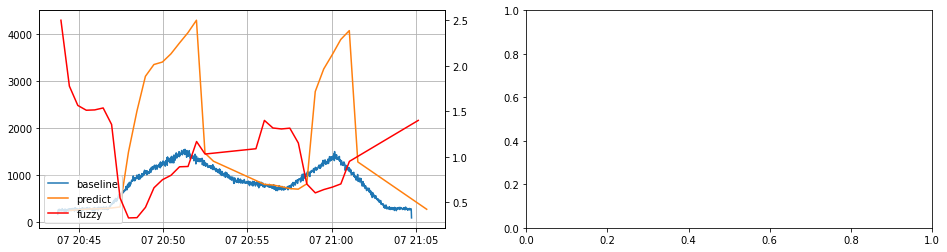

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
ln1 = axes[0].plot(simulation_log_date_06, simulation_log_count_06,label='baseline')
ln1 = axes[0].plot([datetime.fromisoformat(date_str) + timedelta(hours=9) + timedelta(seconds=30) for date_str in  pred_01["date"]], pred_01["pred_traffic"].apply(lambda x: 0 if x < 0 else x ),label='predict')

ax1 = axes[0].twinx()
ln2 = ax1.plot([datetime.fromisoformat(date_str) + timedelta(hours=9) for date_str in  pred_01["date"]], pred_01["fuzzy"], color='red', label="fuzzy")

h1, l1 = axes[0].get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
axes[0].legend(h1+h2, l1+l2, loc='lower left')

axes[0].grid(True)

In [13]:
simulation_log_07 = parse("simulation_07.log")
simulation_log_date_07 = simulation_log_07["date"]
simulation_log_count_07 = simulation_log_07["count"]

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_99305/1581826677.py:4: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])


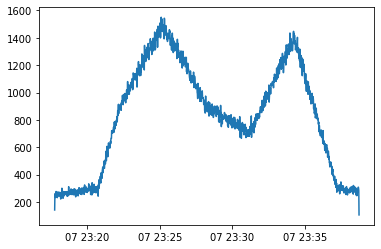

In [14]:
plt.plot(simulation_log_date_07, simulation_log_count_07)

In [16]:
pred_01 = pd.read_csv("pred_20220807141749.log", names=["index", "date", "fuzzy", "sample", "pairwise",  "trend", "burst_mode", "entropy_mode", "pred_traffic", "pred_container"])
pred_01

,index,date,fuzzy,sample,pairwise,trend,burst_mode,entropy_mode,pred_traffic,pred_container
0,0,2022-08-07T14:17:49.312310,NaN,NaN,-0.981981,Trend.Down,BurstMode.POOR,EntropyMode.EXPECTED,255.095238,5
1,0,2022-08-07T14:18:19.426794,1.877217,inf,0.090466,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,262.309900,5
2,0,2022-08-07T14:18:49.485155,1.688265,2.268684,0.253555,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,272.276584,5
3,0,2022-08-07T14:19:19.745174,1.603903,2.131627,0.368395,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,279.786328,5
4,0,2022-08-07T14:19:49.616782,1.541350,1.929910,0.466383,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,292.286837,5
5,0,2022-08-07T14:20:19.685757,1.576767,1.890850,0.451763,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,301.809313,5
6,0,2022-08-07T14:20:49.714663,1.514207,2.367124,0.464224,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,314.812354,6
7,0,2022-08-07T14:21:19.869119,0.723570,0.912510,0.771714,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,569.767111,10
8,0,2022-08-07T14:21:49.991641,0.428112,0.543086,0.946942,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,952.898408,17
9,0,2022-08-07T14:22:20.247699,0.340368,0.496691,0.992544,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,1287.063542,23


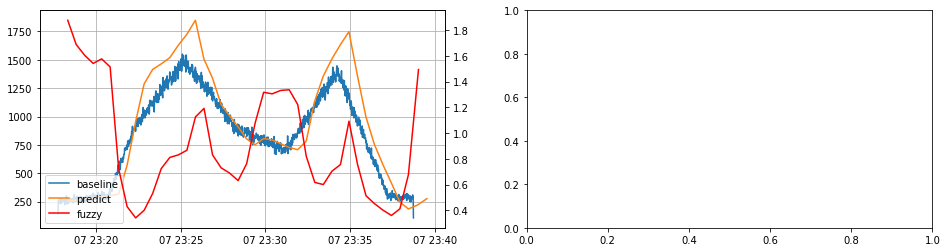

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
ln1 = axes[0].plot(simulation_log_date_07, simulation_log_count_07,label='baseline')
ln1 = axes[0].plot([datetime.fromisoformat(date_str) + timedelta(hours=9) + timedelta(seconds=30) for date_str in  pred_01["date"]], pred_01["pred_traffic"].apply(lambda x: 0 if x < 0 else x ),label='predict')

ax1 = axes[0].twinx()
ln2 = ax1.plot([datetime.fromisoformat(date_str) + timedelta(hours=9) for date_str in  pred_01["date"]], pred_01["fuzzy"], color='red', label="fuzzy")

h1, l1 = axes[0].get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
axes[0].legend(h1+h2, l1+l2, loc='lower left')

axes[0].grid(True)

In [11]:
simulation_log_08 = parse("simulation_08.log")
simulation_log_date_08 = simulation_log_08["date"]
simulation_log_count_08 = simulation_log_08["count"]

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_43348/600845077.py:4: DtypeWarning: Columns (2,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])


In [26]:
pred_08 = pd.read_csv("pred_20220811141041.log", names=["index", "date", "fuzzy", "sample", "pairwise",  "trend", "burst_mode", "entropy_mode", "pred_traffic", "pred_container"])
pred_08

,index,date,fuzzy,sample,pairwise,trend,burst_mode,entropy_mode,pred_traffic,pred_container
0,0,2022-08-11T14:11:12.107169,1.524356,2.639057,0.162938,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,262.266582,5
1,0,2022-08-11T14:11:42.188105,1.556550,2.169054,0.408792,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,279.112111,5
2,0,2022-08-11T14:12:12.426660,1.522494,2.183238,0.478707,Trend.MIDDLE,BurstMode.POOR,EntropyMode.EXPECTED,283.497151,5
3,0,2022-08-11T14:12:42.315272,1.513583,1.906170,0.557689,Trend.Up,BurstMode.POOR,EntropyMode.EXPECTED,295.046273,5
4,0,2022-08-11T14:13:12.372489,1.500618,2.215574,0.567943,Trend.Up,BurstMode.POOR,EntropyMode.EXPECTED,306.189547,6
5,0,2022-08-11T14:13:42.440444,1.505958,2.614960,0.542139,Trend.Up,BurstMode.POOR,EntropyMode.EXPECTED,317.770267,6
6,0,2022-08-11T14:14:12.540593,0.642877,0.899400,0.795482,Trend.Up,BurstMode.STRONG,EntropyMode.SURPRISE,694.239497,13
7,0,2022-08-11T14:14:42.685192,0.430317,0.442938,0.943314,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,912.881943,17
8,0,2022-08-11T14:15:12.856708,0.377043,0.569353,0.987997,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,1201.733344,22
9,0,2022-08-11T14:15:43.121960,0.455106,0.808563,0.981289,Trend.Up,BurstMode.MIDDLE,EntropyMode.SURPRISE,1314.981269,24


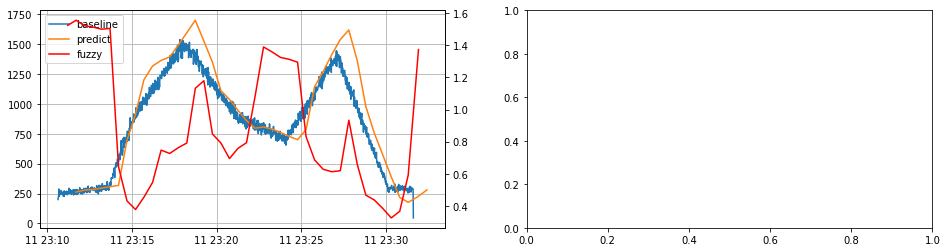

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
ln1 = axes[0].plot(simulation_log_date_08, simulation_log_count_08,label='baseline')
ln1 = axes[0].plot([datetime.fromisoformat(date_str) + timedelta(hours=9) + timedelta(seconds=30) for date_str in  pred_08["date"]], pred_08["pred_traffic"].apply(lambda x: 0 if x < 0 else x ),label='predict')

ax1 = axes[0].twinx()
ln2 = ax1.plot([datetime.fromisoformat(date_str) + timedelta(hours=9) for date_str in  pred_08["date"]], pred_08["fuzzy"], color='red', label="fuzzy")

h1, l1 = axes[0].get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
axes[0].legend(h1+h2, l1+l2, loc='upper left')

axes[0].grid(True)

In [8]:
def compute_enet( x_train, y_train, alpha = 1.0, l1_ratio = 0.5) -> ElasticNet:
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(x_train, y_train)

In [9]:
def enet_loop(x, y, alpha = 1.0, l1_ratio = 0.5, batch_size = 100, incr = 30):
    y_pred = pd.DataFrame([])
    counter = batch_size
    while len(x) > counter:
        try:
            x_train = x[counter-batch_size:counter]
            y_train = y[counter-batch_size:counter]
            x_test = x[counter:counter+incr].reshape(-1, 1)
            enet = compute_enet(x_train, y_train, alpha, l1_ratio)
            target_y_pred = enet.predict(x_test)
            y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
            counter += incr
        except Exception as e:
            print(e)
            counter += incr
    return y_pred

In [22]:
enet_pred_08 = enet_loop(np.array([d.astype(int) / 10**9 for d in simulation_log_08["date"].to_numpy()]).reshape(-1, 1), simulation_log_08["count"].to_numpy().reshape(-1, 1))

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_43348/528662011.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_43348/528662011.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_43348/528662011.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_43348/528662011.py:11: FutureWarning: The frame.append method is deprecated a

In [23]:
enet_pred_08

,0
0,277.501313
1,277.837973
2,278.174633
3,278.511292
4,278.847952
...,...
1156,224.530470
1157,223.046117
1158,221.561763
1159,220.077409


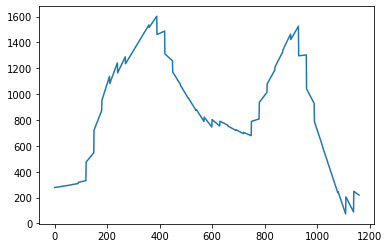

In [24]:
plt.plot(enet_pred_08)

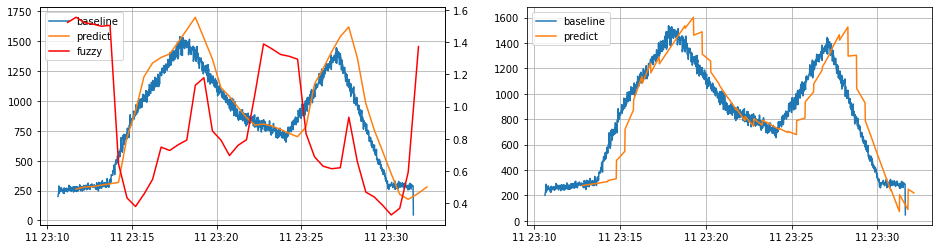

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
ln1 = axes[0].plot(simulation_log_date_08, simulation_log_count_08,label='baseline')
ln1 = axes[0].plot([datetime.fromisoformat(date_str) + timedelta(hours=9) + timedelta(seconds=30) for date_str in  pred_08["date"]], pred_08["pred_traffic"].apply(lambda x: 0 if x < 0 else x ),label='predict')

ax1 = axes[0].twinx()
ln2 = ax1.plot([datetime.fromisoformat(date_str) + timedelta(hours=9) for date_str in  pred_08["date"]], pred_08["fuzzy"], color='red', label="fuzzy")

h1, l1 = axes[0].get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
axes[0].legend(h1+h2, l1+l2, loc='upper left')

axes[0].grid(True)

ln2 = axes[1].plot(simulation_log_date_08, simulation_log_count_08,label='baseline')
ln2 = axes[1].plot([date + timedelta(seconds=30) for date in  simulation_log_date_08][100:], enet_pred_08,label='predict')

h1, l1 = axes[1].get_legend_handles_labels()
axes[1].legend(h1, l1, loc='upper left')

axes[1].grid(True)

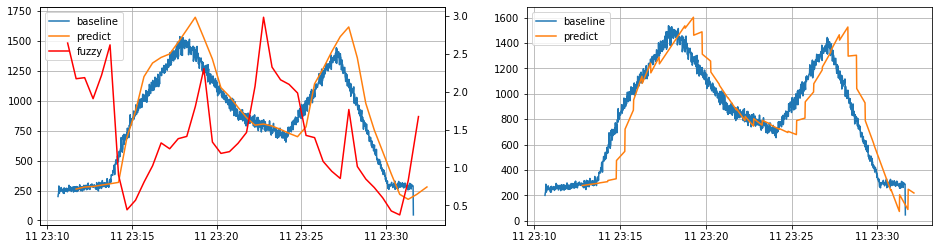

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
ln1 = axes[0].plot(simulation_log_date_08, simulation_log_count_08,label='baseline')
ln1 = axes[0].plot([datetime.fromisoformat(date_str) + timedelta(hours=9) + timedelta(seconds=30) for date_str in  pred_08["date"]], pred_08["pred_traffic"].apply(lambda x: 0 if x < 0 else x ),label='predict')

ax1 = axes[0].twinx()
ln2 = ax1.plot([datetime.fromisoformat(date_str) + timedelta(hours=9) for date_str in  pred_08["date"]], pred_08["sample"], color='red', label="fuzzy")

h1, l1 = axes[0].get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
axes[0].legend(h1+h2, l1+l2, loc='upper left')

axes[0].grid(True)

ln2 = axes[1].plot(simulation_log_date_08, simulation_log_count_08,label='baseline')
ln2 = axes[1].plot([date + timedelta(seconds=30) for date in  simulation_log_date_08][100:], enet_pred_08,label='predict')

h1, l1 = axes[1].get_legend_handles_labels()
axes[1].legend(h1, l1, loc='upper left')

axes[1].grid(True)

In [27]:
from __future__ import annotations
from typing import List

class PredictTrafficSizeHistory:
    array: List[float] = []

    def __init__(self, v: List[float]):
        self.array = v

    @classmethod
    def appended(cls, v: float):
        if len(cls.array) >= 10:
            cls.array.pop(0)
        cls.array.append(v)

In [28]:
a= PredictTrafficSizeHistory([1.2, 2.3])
a.array

[1.2, 2.3]

In [23]:
a.array.pop()
a.array

[1.2]

In [31]:
a.appended(2.1)
a.array

[1.2, 2.3]

In [32]:
a.appended(2.1)
a.array

[1.2, 2.3]

In [25]:
a= [1,2,3,4]

a.pop(0)

1

In [47]:
x = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]).reshape(-1, 1)
y = np.array([60, 140, 210, 290, 360, 420, 500, 580, 640, 700, 760, 820]).reshape(-1, 1)

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 3次元の特徴量に変換
# polynomial_features= PolynomialFeatures(degree=5)
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('linear', LinearRegression())
])
regr.fit(x, y)


Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

In [59]:
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

array([[1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 1.000000e+01, 1.000000e+02, 1.000000e+03,
        1.000000e+04, 1.000000e+05],
       [1.000000e+00, 1.200000e+01, 1.440000e+02, 1.728000e+03,
        2.073600e+04, 2.488320e+05],
       [1.000000e+00, 1.400000e+01, 1.960000e+02, 2.744000e+03,
        3.841600e+04, 5.378240e+05],
       [1.000000e+00, 1.600000e+01, 2.560000e+02, 4.096000e+03,
        6.553600e+04, 1.048576e+06],
       [1.000000e+00, 1.800000e+01, 3.240000e+02, 5.832000e+03,
        1.049760e+05, 1.889568e+06],
       [1.000000e+00, 2.000000e+01, 4.000000e+02, 8.000000e+03,
        1.600000e+05, 3.200

In [62]:
regr.predict([[1]])

array([[21.64270408]])

In [49]:
def compute_enet(x_train, y_train, alpha=1.0, l1_ratio=0.5) -> ElasticNet:
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(x_train, y_train)

enet = compute_enet(x, y)

In [43]:
enet.predict(np.array([x for x in range(30)]).reshape(-1, 1))

array([  10.12341407,   44.47289504,   78.82237601,  113.17185698,
        147.52133795,  181.87081892,  216.22029988,  250.56978085,
        284.91926182,  319.26874279,  353.61822376,  387.96770473,
        422.3171857 ,  456.66666667,  491.01614764,  525.3656286 ,
        559.71510957,  594.06459054,  628.41407151,  662.76355248,
        697.11303345,  731.46251442,  765.81199539,  800.16147636,
        834.51095732,  868.86043829,  903.20991926,  937.55940023,
        971.9088812 , 1006.25836217])

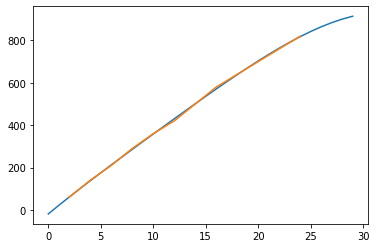

In [63]:
plt.plot(regr.predict(np.array([x for x in range(30)]).reshape(-1, 1)))
plt.plot(x,y)

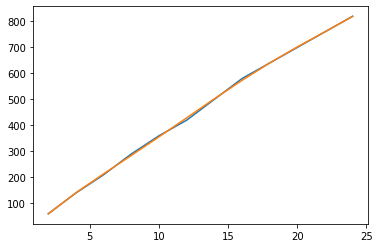

In [53]:
plt.plot(x,y)
plt.plot(x,y_pred)

In [68]:
simulation_log_08 = parse("simulation_08.log")
simulation_log_date_08 = simulation_log_08["date"]
simulation_log_count_08 = simulation_log_08["count"]

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_50497/600845077.py:4: DtypeWarning: Columns (2,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])


In [69]:
simulation_log_count_08

0       200
1       220
2       223
3       288
4       231
       ... 
1256    287
1257    287
1258    290
1259    288
1260     46
Name: count, Length: 1261, dtype: int64

In [ ]:
is_burst = False
pred_enet = NotImplementedError
pred_container_size = NotImplementedError(pred_enet)


sigma_max = 0
n_max = 0
